Set default font size to make things look prettier

In [1]:
set(0,'defaultAxesFontSize',20,'defaultLineLineWidth',5)

# In-class example with complex roots

First, example using the analytical solution

In [2]:
#Eigenvalues of example matrix
A=[0 2;-2 0];
eig(A)

ans =

   0.0000 + 2.0000i
   0.0000 - 2.0000i



This agrees with our calculation by hand. Now, let's solve it numerically for a single initial condition

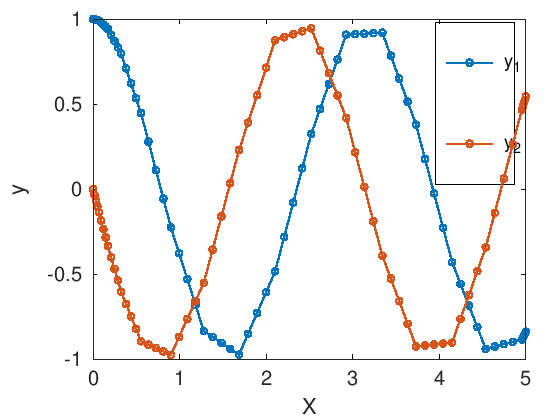

In [10]:
function yprime = example_diffeq(t, y)
    # A has complex roots
    A=[0 2;-2 0];
    yprime=A*y;
end
    
ode45(@example_diffeq,[0 5],[1;0])
hold all;

xlabel('X')
ylabel('y')
legend('y_1','y_2')


This looks strange, let's investigate whether the solution is actually sinusoidal

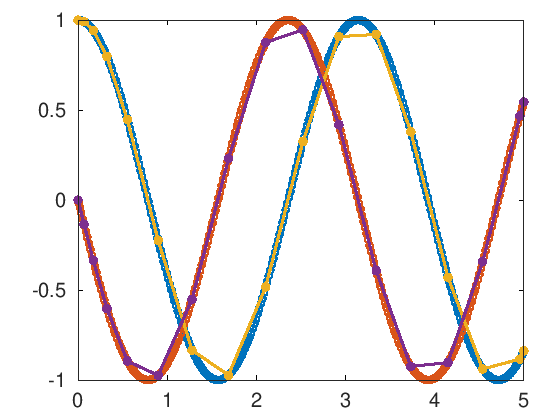

In [4]:
[t_inaccurate, y_inaccurate] = ode45(@example_diffeq,[0 5],[1;0]);

opt = odeset("AbsTol",1e-10,  "RelTol", 1e-10);
[t_accurate,y_accurate] = ode45(@example_diffeq,[0 5],[1;0],opt);


plot(t_accurate,y_accurate,'o-')
hold all;
plot(t_inaccurate,y_inaccurate,'o-','LineWidth',8)
hold all;

Let's try different boundary conditions

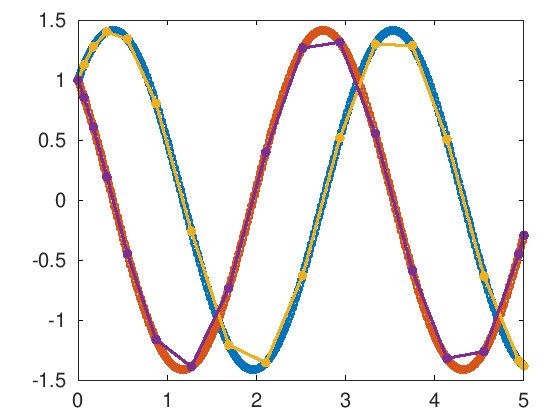

In [5]:
[t_inaccurate, y_inaccurate] = ode45(@example_diffeq,[0 5],[1;1]);

opt = odeset("AbsTol",1e-10,  "RelTol", 1e-10);
[t_accurate,y_accurate] = ode45(@example_diffeq,[0 5],[1;1],opt);


plot(t_accurate,y_accurate,'o-')
hold all;
plot(t_inaccurate,y_inaccurate,'o-','LineWidth',8)
hold all;

# Non-homogeneous example

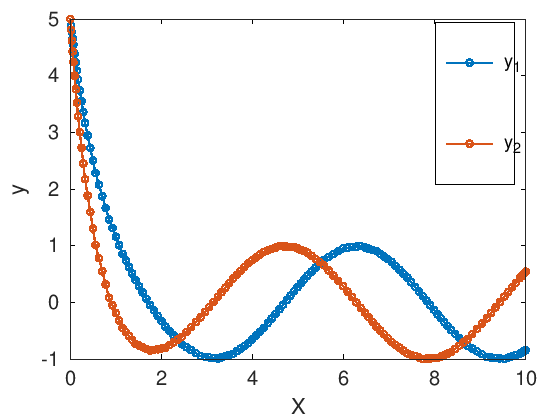

In [6]:
function yprime = example_diffeq(t, y)
    #Note we've had to include t every time so far but 
    # we've never used it!
    
    A=[-3 1; 1 -3];
    yprime=A*y+[3*cos(t);-2*cos(t)-3*sin(t)];
end
    
ode45(@example_diffeq,[0 10],[5;5])
hold all;

xlabel('X')
ylabel('y')
legend('y_1','y_2')


Let's investigate how the different components in the analytical solution contributes

C =

   0.50000
   4.50000



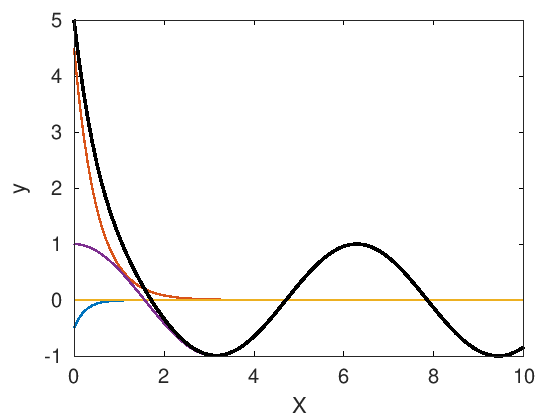

In [9]:
#Define the time range we're interested in
t=linspace(0,10);

#Solve for the coefficients C for the initial conditions
C = [-1 1;1 1]\([5;5]-[1;0]) #Note [-1;0] which is the non-homogenous part at t=0

#Calculate each term
term1 = C(1)*[-1;1]*exp(-4*t);
term2 = C(2)*[1;1]*exp(-2*t);
term3 = [0;-1]*sin(t);
term4 = [1;0]*cos(t);

#Plot each term on it's own
plot(t,term1(1,:),t,term2(1,:),t,term3(1,:),t,term4(1,:))
hold all;
plot(t,term1(1,:)+term2(1,:)+term3(1,:)+term4(1,:),'k-','LineWidth',10)


xlabel('X')
ylabel('y')